In [28]:
library(Seurat)
library(limma)
library(ggplot2)
library(patchwork)
library(edgeR)
library(statmod)
library(ggpubr)
library(ggrepel)
library(dplyr)

In [ ]:
data <- readRDS("/data/ZhanglabShare/Nhlh2_progject/Nhlh2.neuron.v2.91479cells.rds")
data <- FindNeighbors(data,dims = 1:40)
data <- FindClusters(object = data, resolution = 0.8,verbose = FALSE)
DimPlot(data,label = T)+theme(aspect.ratio = 1)

In [99]:
male <- subset(data, sex=="Male")
male_subset = subset(male,integrated_snn_res.0.8==23)
male_subset

An object of class Seurat 
43571 features across 592 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [101]:
male_subset <- FindVariableFeatures(male_subset)

Warning message in FindVariableFeatures.Assay(object = object[[assay]], selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”


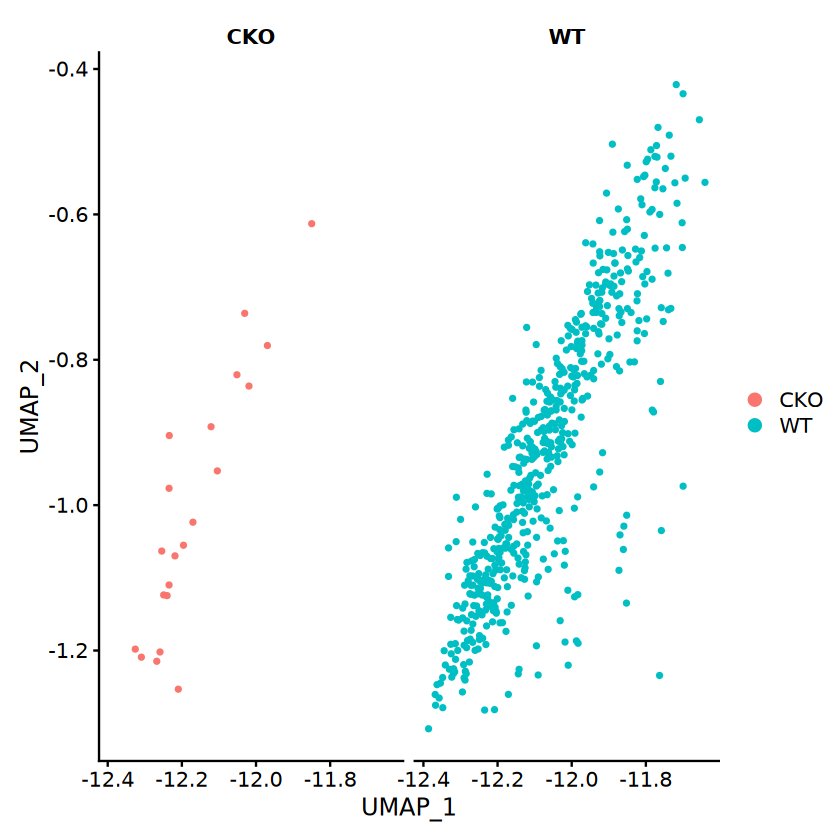

In [22]:
DimPlot(male_subset,split.by = 'treatment')

In [68]:
Idents(male_subset)=male_subset$treatment
male_markers = FindMarkers(male_subset,ident.1 = 'CKO',test.use = "wilcox_limma" )

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
“NaNs produced”
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
“NaNs produced”


In [69]:
#阈值确定：
Pvalue = 0.05
log2FC = 1
# 确定上下调表达基因
male_markers$Group = as.factor(ifelse(male_markers$p_val_adj < Pvalue & abs(male_markers$avg_log2FC) > log2FC,
                                      ifelse(male_markers$avg_log2FC > log2FC ,'Up','Down'),'Stable'))
table(male_markers$Group)

male_markers$Group <- factor(male_markers$Group, levels = c("Up","Stable","Down"))
male_markers


  Down Stable     Up 
   104   1133    615 

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Gm34567,1.813752e-130,4.867026,1.000,0.000,3.627504e-127,Up
Il9r,7.738432e-125,4.856139,1.000,0.000,1.547686e-121,Up
Gm2716,3.717914e-107,4.947534,0.952,0.000,7.435828e-104,Up
Ripply3,8.342041e-102,2.780496,0.952,0.002,1.668408e-98,Up
Nxf3,6.410819e-97,3.167562,0.952,0.004,1.282164e-93,Up
Wnt6,2.017423e-94,4.855601,1.000,0.014,4.034846e-91,Up
Gm48597,1.444403e-90,4.725357,0.048,0.005,2.888807e-87,Up
Gm37472,1.107424e-87,2.947327,0.048,0.009,2.214848e-84,Up
Fbxw22,1.191059e-87,4.437929,0.048,0.009,2.382117e-84,Up


In [70]:
male_markers$Symbol <- rownames(male_markers)

In [71]:
Up <- filter(male_markers, Group == 'Up') %>% distinct(Symbol, .keep_all = T) %>% top_n(5, -log10(p_val_adj))
Down <- filter(male_markers, Group == 'Down') %>% distinct(Symbol, .keep_all = T) %>% top_n(5, -log10(p_val_adj))
head(Up);head(Down)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Group,Symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Gm34567,1.813752e-130,4.867026,1.000,0.000,3.627504e-127,Up,Gm34567
Il9r,7.738432e-125,4.856139,1.000,0.000,1.547686e-121,Up,Il9r
Gm2716,3.717914e-107,4.947534,0.952,0.000,7.435828e-104,Up,Gm2716
Ripply3,8.342041e-102,2.780496,0.952,0.002,1.668408e-98,Up,Ripply3
Nxf3,6.410819e-97,3.167562,0.952,0.004,1.282164e-93,Up,Nxf3


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Group,Symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Gm6213,4.471353e-58,-2.631587,0.095,0.014,8.942705e-55,Down,Gm6213
Gm13423,1.055190e-33,-1.138954,0.143,0.026,2.110381e-30,Down,Gm13423
Cyp2j8,9.247178e-30,-2.136817,0.238,0.009,1.849436e-26,Down,Cyp2j8
Gm30371,4.074302e-29,-2.420302,0.143,0.039,8.148605e-26,Down,Gm30371
Myocd,5.445455e-25,-1.210567,0.762,0.016,1.089091e-21,Down,Myocd


In [94]:

gene_show <- c(rownames(Up),rownames(Down))
male_markers$label <- ifelse(rownames(male_markers) %in% gene_show, rownames(male_markers), '')
male_markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Group,Symbol,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
Gm34567,1.813752e-130,4.867026,1.000,0.000,3.627504e-127,Up,Gm34567,Gm34567
Il9r,7.738432e-125,4.856139,1.000,0.000,1.547686e-121,Up,Il9r,Il9r
Gm2716,3.717914e-107,4.947534,0.952,0.000,7.435828e-104,Up,Gm2716,Gm2716
Ripply3,8.342041e-102,2.780496,0.952,0.002,1.668408e-98,Up,Ripply3,Ripply3
Nxf3,6.410819e-97,3.167562,0.952,0.004,1.282164e-93,Up,Nxf3,Nxf3
Wnt6,2.017423e-94,4.855601,1.000,0.014,4.034846e-91,Up,Wnt6,
Gm48597,1.444403e-90,4.725357,0.048,0.005,2.888807e-87,Up,Gm48597,
Gm37472,1.107424e-87,2.947327,0.048,0.009,2.214848e-84,Up,Gm37472,
Fbxw22,1.191059e-87,4.437929,0.048,0.009,2.382117e-84,Up,Fbxw22,


In [95]:
mytheme <- theme_bw() + 
  theme(legend.key = element_rect(fill = 'transparent'), 
        legend.background = element_rect(fill = 'transparent'), 
        legend.position = c(0.15, 0.9),
        legend.title = element_blank(),
        legend.text = element_text(size = 20,margin = margin(t = 6)), 
        axis.text.x = element_text(hjust = 0.5,size = 18), 
        axis.text.y = element_text(size = 18), 
        axis.title.x = element_text(size = 20), 
        axis.title.y = element_text(size = 20), 
        axis.line = element_line(size = 1),
        plot.title = element_text(size = 24, hjust = 0.5))

Warning message:
“Duplicated aesthetics after name standardisation: size”


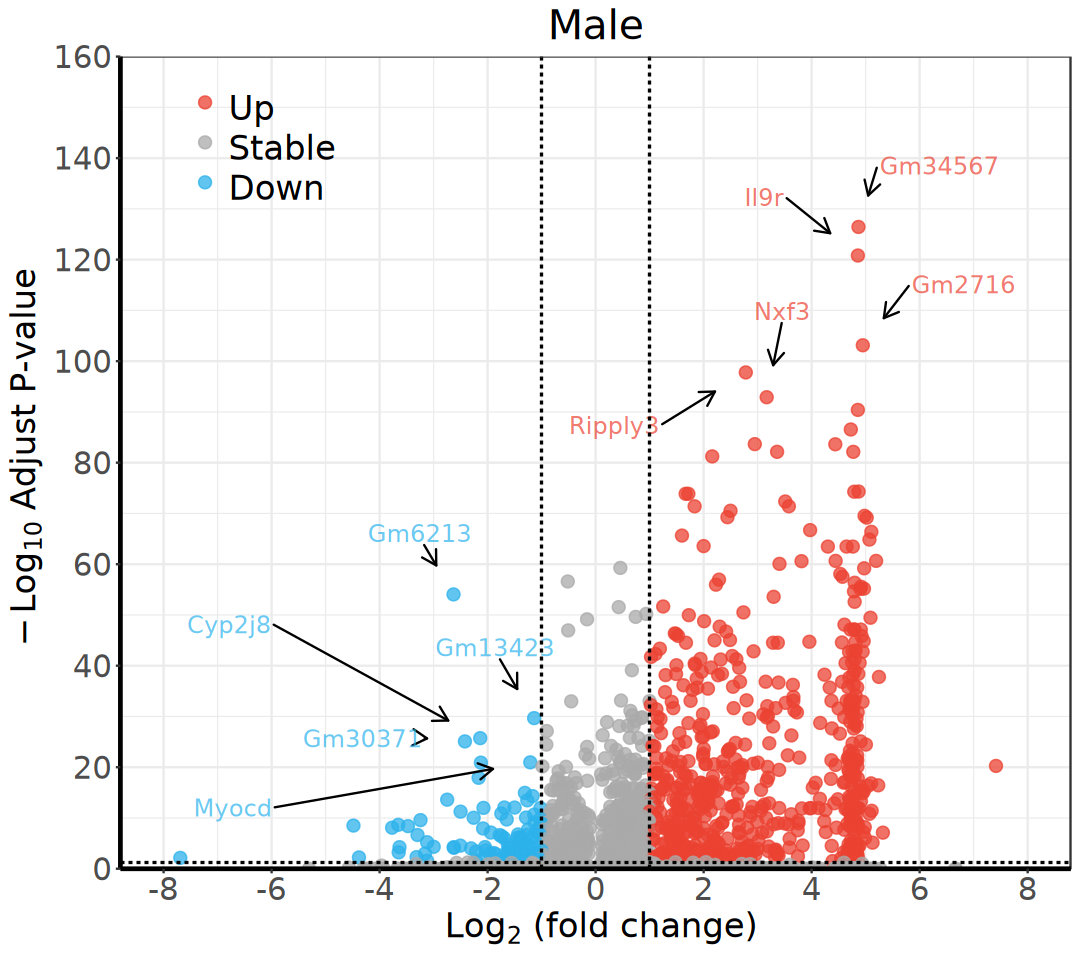

In [97]:
volcano = ggplot(male_markers, aes(x=avg_log2FC, y=-log10(p_val_adj),color = Group)) +
  geom_point(alpha = 0.75, size = 3) +
  labs(x = bquote(~Log[2]~"(fold change)"), 
       y = bquote(~-Log[10]~italic("Adjust P-value")), 
       title = "Male") +
  geom_text_repel(aes(x = avg_log2FC,y = -log10(p_val_adj),label = label),size = 5,
                    box.padding = unit(2,"lines"),point.padding = unit(3,"lines"),
                    segment.color = "black",show.legend = FALSE,
                  min.segment.length = 0,#始终为标签添加指引线段；若不想添加线段，则改为Inf
                  segment.linetype = 1, #线段类型,1为实线,2-6为不同类型虚线
                  force = 10,#重叠标签间的排斥力
                  force_pull = 1,#标签和数据点间的吸引力
                  size = 8,
                  max.overlaps = Inf,
                  arrow = arrow(length = unit(0.02, "npc"),type = "open", ends = "last"))+
  #scale_colour_manual( values = c('red','gray','blue') )+
  scale_colour_manual(name = "", values = alpha(c("#EB4232","darkgrey","#2DB2EB"), 0.7)) + 
  scale_x_continuous(limits = c(-8, 8),breaks = seq(-8, 8, by = 2)) + 
  scale_y_continuous(expand = expansion(add = c(0, 0)),limits = c(0, 160),breaks = seq(0, 160, by = 20)) + 
  geom_hline(yintercept = c(-log10(Pvalue)),size = 0.7,color = "black",lty = "dashed") + 
  geom_vline(xintercept = c(-log2FC, log2FC),size = 0.7,color = "black",lty = "dashed")+
  mytheme
options(repr.plot.width=9, repr.plot.height=8)
volcano

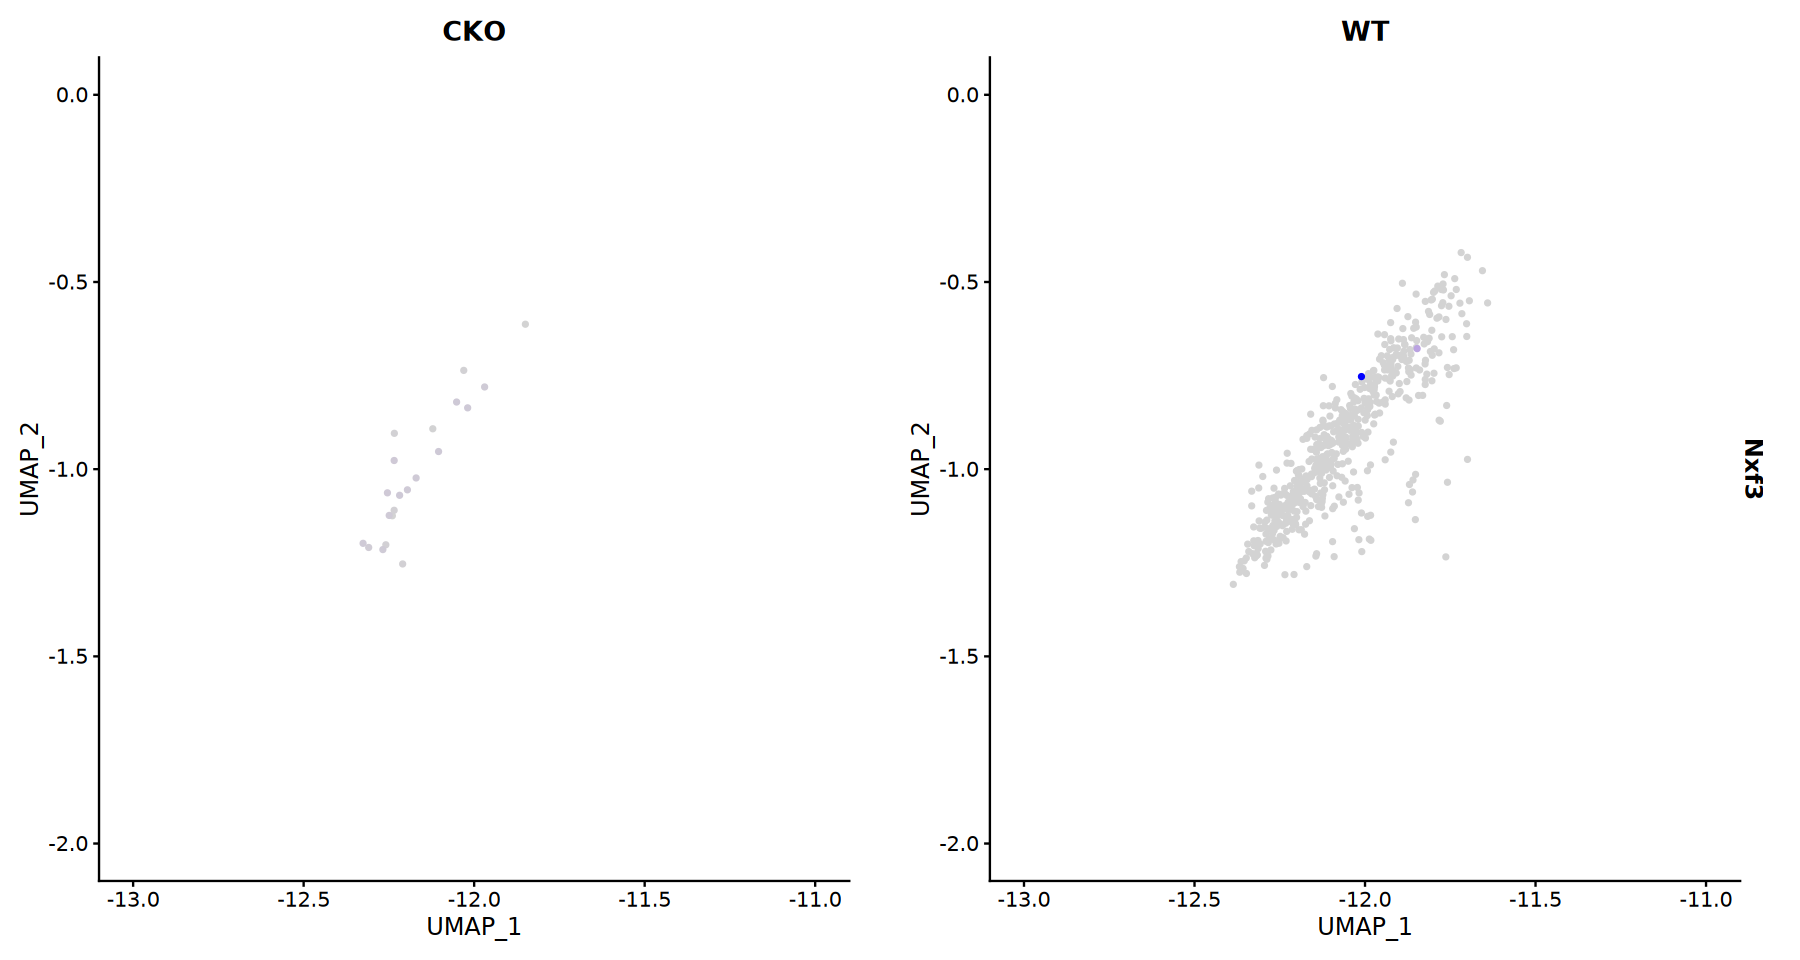

In [98]:
options(repr.plot.width=15, repr.plot.height=8)
FeaturePlot(male_subset,features = 'Nxf3',split.by = 'treatment',order = T)

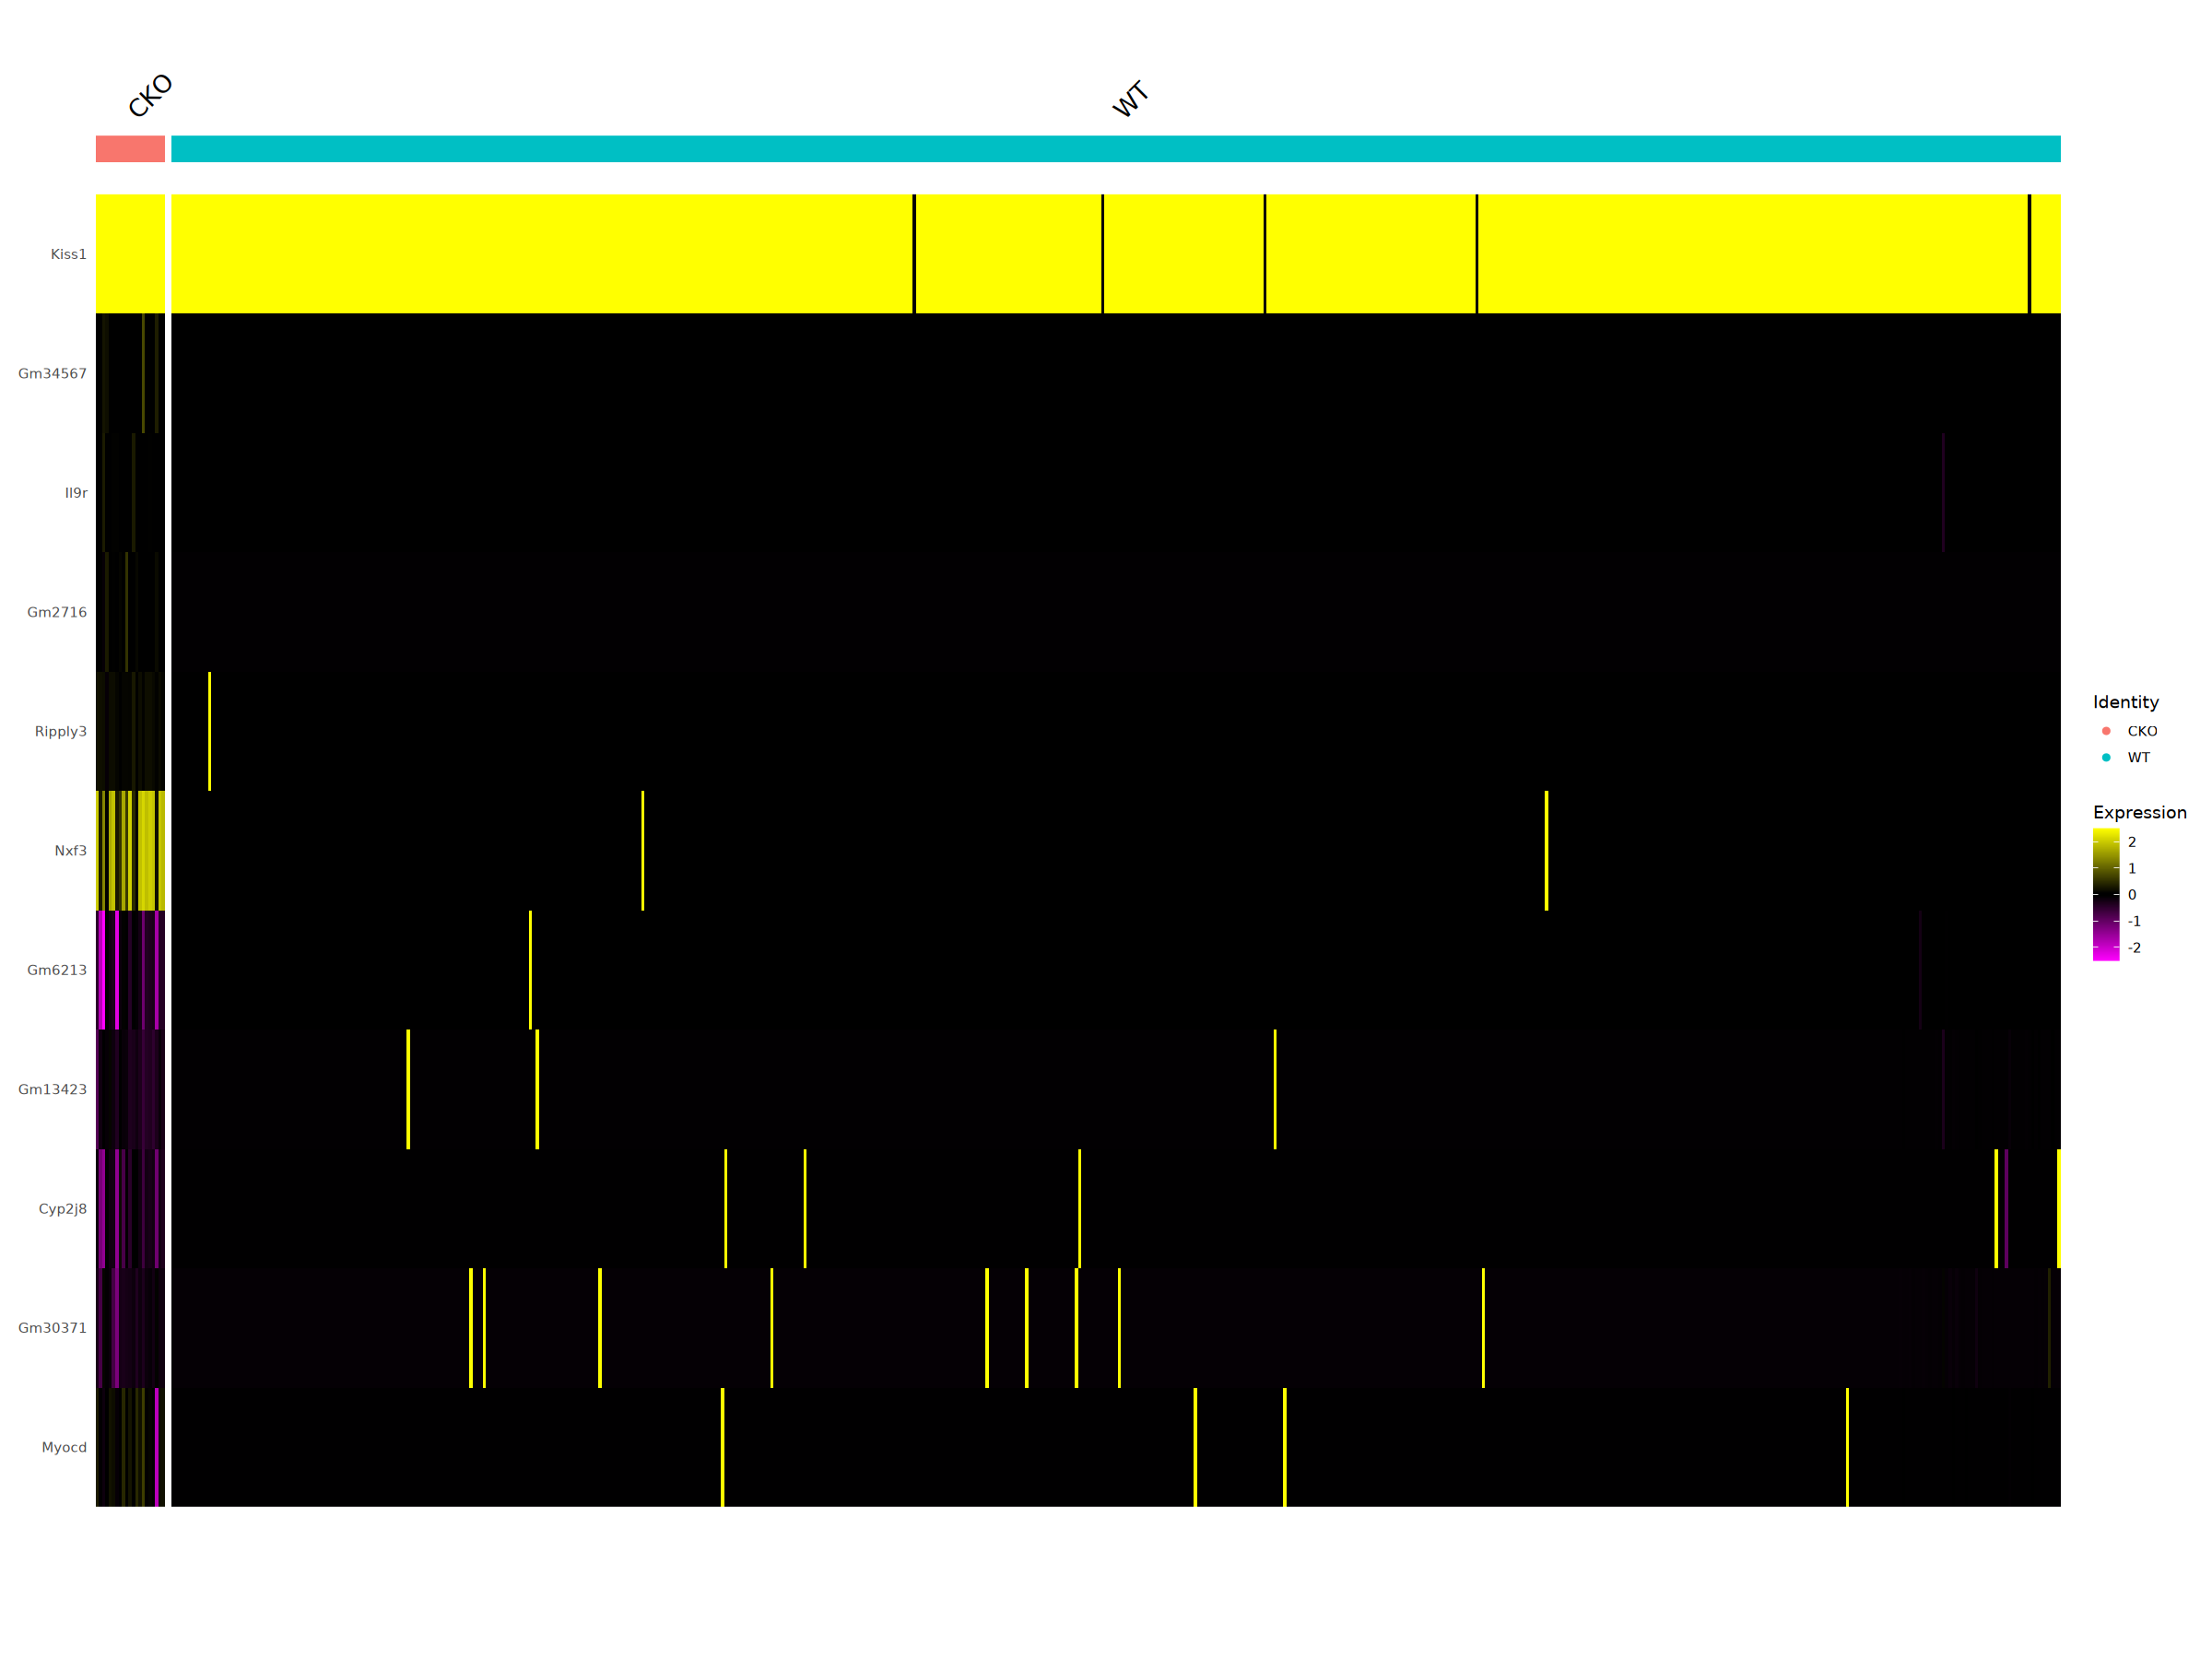

In [93]:
options(repr.plot.width=20, repr.plot.height=15)
DoHeatmap(male_subset,features = c(gene_show),group.by = 'treatment')